In [1]:
import numpy as np

In [2]:
import pandas as pd

# Object creation

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range("20130101", periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]:
df

,A,B,C,D
2013-01-01,-0.208825,-1.174588,0.297492,0.907484
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243
2013-01-04,3.037154,-0.279420,-0.859078,0.546190
2013-01-05,0.083452,1.180529,-1.158901,0.926717
2013-01-06,-0.603329,1.727309,-0.842303,0.365300


In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

In [12]:
df.head()

,A,B,C,D
2013-01-01,-0.208825,-1.174588,0.297492,0.907484
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243
2013-01-04,3.037154,-0.279420,-0.859078,0.546190
2013-01-05,0.083452,1.180529,-1.158901,0.926717


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,3.037154,-0.279420,-0.859078,0.546190
2013-01-05,0.083452,1.180529,-1.158901,0.926717
2013-01-06,-0.603329,1.727309,-0.842303,0.365300


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.to_numpy()

array([[-0.20882473, -1.17458795,  0.29749201,  0.90748387],
       [ 0.957188  ,  0.69338848,  0.70930075,  1.91630378],
       [-1.02157191,  0.2489449 , -0.27017961, -1.88824294],
       [ 3.03715378, -0.27942036, -0.8590778 ,  0.54619047],
       [ 0.08345195,  1.18052934, -1.15890103,  0.92671669],
       [-0.60332862,  1.72730896, -0.84230317,  0.36530003]])

In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

numpy 所有数据是一个类型，pandas中数据一列是一个类型，转化后不包含index列

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.374011,0.399361,-0.353945,0.462292
std,1.466928,1.041231,0.735321,1.270393
min,-1.021572,-1.174588,-1.158901,-1.888243
25%,-0.504703,-0.147329,-0.854884,0.410523
50%,-0.062686,0.471167,-0.556241,0.726837
75%,0.738754,1.058744,0.155574,0.921908
max,3.037154,1.727309,0.709301,1.916304


In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.208825,0.957188,-1.021572,3.037154,0.083452,-0.603329
B,-1.174588,0.693388,0.248945,-0.279420,1.180529,1.727309
C,0.297492,0.709301,-0.270180,-0.859078,-1.158901,-0.842303
D,0.907484,1.916304,-1.888243,0.546190,0.926717,0.365300


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.907484,0.297492,-1.174588,-0.208825
2013-01-02,1.916304,0.709301,0.693388,0.957188
2013-01-03,-1.888243,-0.270180,0.248945,-1.021572
2013-01-04,0.546190,-0.859078,-0.279420,3.037154
2013-01-05,0.926717,-1.158901,1.180529,0.083452
2013-01-06,0.365300,-0.842303,1.727309,-0.603329


In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,-0.208825,-1.174588,0.297492,0.907484
2013-01-04,3.037154,-0.279420,-0.859078,0.546190
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-05,0.083452,1.180529,-1.158901,0.926717
2013-01-06,-0.603329,1.727309,-0.842303,0.365300


# Selection

## Getting

In [22]:
df["A"]

2013-01-01   -0.208825
2013-01-02    0.957188
2013-01-03   -1.021572
2013-01-04    3.037154
2013-01-05    0.083452
2013-01-06   -0.603329
Freq: D, Name: A, dtype: float64

In [23]:
df.A

2013-01-01   -0.208825
2013-01-02    0.957188
2013-01-03   -1.021572
2013-01-04    3.037154
2013-01-05    0.083452
2013-01-06   -0.603329
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.208825,-1.174588,0.297492,0.907484
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243
2013-01-04,3.037154,-0.279420,-0.859078,0.546190


## Selection by label

In [26]:
df.loc[dates[0]]

A   -0.208825
B   -1.174588
C    0.297492
D    0.907484
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.208825,-1.174588
2013-01-02,0.957188,0.693388
2013-01-03,-1.021572,0.248945
2013-01-04,3.037154,-0.279420
2013-01-05,0.083452,1.180529
2013-01-06,-0.603329,1.727309


In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.957188,0.693388
2013-01-03,-1.021572,0.248945
2013-01-04,3.037154,-0.279420


In [29]:
df.loc["20130102", ["A", "B"]]

A    0.957188
B    0.693388
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0], "A"]

-0.20882473318944478

In [31]:
df.at[dates[0], "A"]

-0.20882473318944478

## Selection by position

In [32]:
df.iloc[3]

A    3.037154
B   -0.279420
C   -0.859078
D    0.546190
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,3.037154,-0.279420
2013-01-05,0.083452,1.180529


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.957188,0.709301
2013-01-03,-1.021572,-0.270180
2013-01-05,0.083452,-1.158901


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.174588,0.297492
2013-01-02,0.693388,0.709301
2013-01-03,0.248945,-0.270180
2013-01-04,-0.279420,-0.859078
2013-01-05,1.180529,-1.158901
2013-01-06,1.727309,-0.842303


In [37]:
df.iloc[1, 1]

0.6933884777187386

In [38]:
df.iat[1, 1]

0.6933884777187386

## Boolean indexing

In [39]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-04,3.037154,-0.279420,-0.859078,0.546190
2013-01-05,0.083452,1.180529,-1.158901,0.926717


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.297492,0.907484
2013-01-02,0.957188,0.693388,0.709301,1.916304
2013-01-03,NaN,0.248945,NaN,NaN
2013-01-04,3.037154,NaN,NaN,0.546190
2013-01-05,0.083452,1.180529,NaN,0.926717
2013-01-06,NaN,1.727309,NaN,0.365300


In [41]:
df2 = df.copy()

In [42]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [43]:
df2

,A,B,C,D,E
2013-01-01,-0.208825,-1.174588,0.297492,0.907484,one
2013-01-02,0.957188,0.693388,0.709301,1.916304,one
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243,two
2013-01-04,3.037154,-0.279420,-0.859078,0.546190,three
2013-01-05,0.083452,1.180529,-1.158901,0.926717,four
2013-01-06,-0.603329,1.727309,-0.842303,0.365300,three


In [44]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.021572,0.248945,-0.270180,-1.888243,two
2013-01-05,0.083452,1.180529,-1.158901,0.926717,four


## Setting

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))


In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df["F"] = s1

In [48]:
df.at[dates[0], "A"] = 0

In [49]:
df.iat[0, 1] = 0

In [50]:
df.loc[:, "D"] = np.array([5] * len(df))

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.297492,5,NaN
2013-01-02,0.957188,0.693388,0.709301,5,1.0
2013-01-03,-1.021572,0.248945,-0.270180,5,2.0
2013-01-04,3.037154,-0.279420,-0.859078,5,3.0
2013-01-05,0.083452,1.180529,-1.158901,5,4.0
2013-01-06,-0.603329,1.727309,-0.842303,5,5.0


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.297492,-5,NaN
2013-01-02,-0.957188,-0.693388,-0.709301,-5,-1.0
2013-01-03,-1.021572,-0.248945,-0.270180,-5,-2.0
2013-01-04,-3.037154,-0.279420,-0.859078,-5,-3.0
2013-01-05,-0.083452,-1.180529,-1.158901,-5,-4.0
2013-01-06,-0.603329,-1.727309,-0.842303,-5,-5.0


# Missing data

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [56]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.297492,5,NaN,1.0
2013-01-02,0.957188,0.693388,0.709301,5,1.0,1.0
2013-01-03,-1.021572,0.248945,-0.270180,5,2.0,NaN
2013-01-04,3.037154,-0.279420,-0.859078,5,3.0,NaN


In [58]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.957188,0.693388,0.709301,5,1.0,1.0


In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.297492,5,5.0,1.0
2013-01-02,0.957188,0.693388,0.709301,5,1.0,1.0
2013-01-03,-1.021572,0.248945,-0.270180,5,2.0,5.0
2013-01-04,3.037154,-0.279420,-0.859078,5,3.0,5.0


In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operation

## Stats

In [61]:
df.mean()

A    0.408816
B    0.595125
C   -0.353945
D    5.000000
F    3.000000
dtype: float64

In [62]:
df.mean(1)

2013-01-01    1.324373
2013-01-02    1.671975
2013-01-03    1.191439
2013-01-04    1.979731
2013-01-05    1.821016
2013-01-06    2.056335
Freq: D, dtype: float64

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)  # 向下移动两位，空出来的填充NaN

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.021572,-0.751055,-1.270180,4.0,1.0
2013-01-04,0.037154,-3.279420,-3.859078,2.0,0.0
2013-01-05,-4.916548,-3.819471,-6.158901,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.297492,5,NaN
2013-01-02,0.957188,0.693388,1.006793,10,1.0
2013-01-03,-0.064384,0.942333,0.736613,15,3.0
2013-01-04,2.972770,0.662913,-0.122465,20,6.0
2013-01-05,3.056222,1.843442,-1.281366,25,10.0
2013-01-06,2.452893,3.570751,-2.123669,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    4.058726
B    2.006729
C    1.868202
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    0
1    0
2    5
3    0
4    6
5    5
6    2
7    0
8    4
9    6
dtype: int64

In [70]:
s.value_counts()

0    4
5    2
6    2
2    1
4    1
dtype: int64

## String Methods

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-1.379228,1.669097,0.458549,0.230800
1,0.142868,-1.708305,1.761303,0.211264
2,1.340564,-1.198589,-1.046114,-0.609991
3,-1.500638,0.664371,0.954532,0.105286
4,0.855151,1.724760,0.410376,-1.437814
5,0.763934,1.733392,-1.778778,1.009863
6,0.027917,-0.556562,0.325366,-0.048322
7,2.761980,-0.805855,-0.495398,0.382066
8,0.449268,-0.812066,1.876320,-0.116616
9,0.195294,0.346957,0.610309,-1.132119


In [75]:
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pieces

[          0         1         2         3
 0 -1.379228  1.669097  0.458549  0.230800
 1  0.142868 -1.708305  1.761303  0.211264
 2  1.340564 -1.198589 -1.046114 -0.609991,
           0         1         2         3
 3 -1.500638  0.664371  0.954532  0.105286
 4  0.855151  1.724760  0.410376 -1.437814
 5  0.763934  1.733392 -1.778778  1.009863
 6  0.027917 -0.556562  0.325366 -0.048322,
           0         1         2         3
 7  2.761980 -0.805855 -0.495398  0.382066
 8  0.449268 -0.812066  1.876320 -0.116616
 9  0.195294  0.346957  0.610309 -1.132119]

In [77]:
pd.concat(pieces)

,0,1,2,3
0,-1.379228,1.669097,0.458549,0.230800
1,0.142868,-1.708305,1.761303,0.211264
2,1.340564,-1.198589,-1.046114,-0.609991
3,-1.500638,0.664371,0.954532,0.105286
4,0.855151,1.724760,0.410376,-1.437814
5,0.763934,1.733392,-1.778778,1.009863
6,0.027917,-0.556562,0.325366,-0.048322
7,2.761980,-0.805855,-0.495398,0.382066
8,0.449268,-0.812066,1.876320,-0.116616
9,0.195294,0.346957,0.610309,-1.132119


## Join

In [78]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [79]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [80]:
left

,key,lval
0,foo,1
1,foo,2


In [81]:
right

,key,rval
0,foo,4
1,foo,5


In [82]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [83]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [84]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})


In [85]:
left

,key,lval
0,foo,1
1,bar,2


In [86]:
right

,key,rval
0,foo,4
1,bar,5


In [87]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [88]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [89]:
df

,A,B,C,D
0,foo,one,1.945706,0.514853
1,bar,one,-0.611131,-1.685163
2,foo,two,0.260154,-0.948812
3,bar,three,-0.394324,-0.431763
4,foo,two,-0.582034,0.561857
5,bar,two,-0.261072,0.605367
6,foo,one,0.210167,-1.171770
7,foo,three,0.420672,0.702568


In [90]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.266527,-1.511559
foo,2.254665,-0.341304


In [91]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.611131 -1.685163
    three -0.394324 -0.431763
    two   -0.261072  0.605367
foo one    2.155873 -0.656917
    three  0.420672  0.702568
    two   -0.321880 -0.386955

# Reshaping

## Stack

In [92]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [95]:
df2 = df[:4]

In [96]:
df2

A         B
first second                    
bar   one     0.282984  1.308505
      two    -1.061292  0.707701
baz   one     1.559442  1.621936
      two    -1.629752 -1.725768

In [97]:
stacked = df2.stack()

In [98]:
stacked

first  second   
bar    one     A    0.282984
               B    1.308505
       two     A   -1.061292
               B    0.707701
baz    one     A    1.559442
               B    1.621936
       two     A   -1.629752
               B   -1.725768
dtype: float64

In [99]:
stacked.unstack()

A         B
first second                    
bar   one     0.282984  1.308505
      two    -1.061292  0.707701
baz   one     1.559442  1.621936
      two    -1.629752 -1.725768

by default unstacks the last level:

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.282984 -1.061292
      B  1.308505  0.707701
baz   A  1.559442 -1.629752
      B  1.621936 -1.725768

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.282984  1.559442
       B  1.308505  1.621936
two    A -1.061292 -1.629752
       B  0.707701 -1.725768

## Pivot tables

In [102]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [103]:
df

,A,B,C,D,E
0,one,A,foo,-0.858547,0.197363
1,one,B,foo,0.071500,1.371477
2,two,C,foo,-0.930620,-0.174992
3,three,A,bar,-0.805621,0.935899
4,one,B,bar,1.263910,-0.500338
5,one,C,bar,-0.704690,0.687233
6,two,A,foo,0.165635,-2.287299
7,three,B,foo,0.190774,-0.125332
8,one,C,foo,-0.060503,-0.553430
9,one,A,bar,-0.729001,0.136245


In [104]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.729001 -0.858547
      B  1.263910  0.071500
      C -0.704690 -0.060503
three A -0.805621       NaN
      B       NaN  0.190774
      C  1.510399       NaN
two   A       NaN  0.165635
      B -0.201073       NaN
      C       NaN -0.930620

# Time series

In [105]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [106]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [107]:
ts

2012-01-01 00:00:00    459
2012-01-01 00:00:01    281
2012-01-01 00:00:02     25
2012-01-01 00:00:03    360
2012-01-01 00:00:04    396
                      ... 
2012-01-01 00:01:35    485
2012-01-01 00:01:36    310
2012-01-01 00:01:37    337
2012-01-01 00:01:38    197
2012-01-01 00:01:39    292
Freq: S, Length: 100, dtype: int64

In [108]:
ts.resample("5Min").sum()

2012-01-01    25564
Freq: 5T, dtype: int64

In [109]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [110]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [111]:
ts

2012-03-06    0.676016
2012-03-07    0.703685
2012-03-08    1.173090
2012-03-09    0.928555
2012-03-10   -0.316879
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize("UTC")

In [113]:
ts_utc

2012-03-06 00:00:00+00:00    0.676016
2012-03-07 00:00:00+00:00    0.703685
2012-03-08 00:00:00+00:00    1.173090
2012-03-09 00:00:00+00:00    0.928555
2012-03-10 00:00:00+00:00   -0.316879
Freq: D, dtype: float64

In [114]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.676016
2012-03-06 19:00:00-05:00    0.703685
2012-03-07 19:00:00-05:00    1.173090
2012-03-08 19:00:00-05:00    0.928555
2012-03-09 19:00:00-05:00   -0.316879
Freq: D, dtype: float64

In [115]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [116]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [117]:
ts

2012-01-31   -0.463250
2012-02-29   -1.683322
2012-03-31   -0.697660
2012-04-30   -0.058860
2012-05-31   -0.872536
Freq: M, dtype: float64

In [118]:
ps = ts.to_period()

In [119]:
ps

2012-01   -0.463250
2012-02   -1.683322
2012-03   -0.697660
2012-04   -0.058860
2012-05   -0.872536
Freq: M, dtype: float64

In [120]:
ps.to_timestamp()

2012-01-01   -0.463250
2012-02-01   -1.683322
2012-03-01   -0.697660
2012-04-01   -0.058860
2012-05-01   -0.872536
Freq: MS, dtype: float64

In [121]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [122]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [123]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [124]:
ts.head()

1990-03-01 09:00   -0.318641
1990-06-01 09:00    0.304082
1990-09-01 09:00    0.526874
1990-12-01 09:00    0.085155
1991-03-01 09:00   -0.789429
Freq: H, dtype: float64

# Categoricals

In [125]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)


In [126]:
df["grade"] = df["raw_grade"].astype("category")


In [127]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [128]:
new_categories = ["very good", "good", "very bad"]

In [129]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [130]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [131]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [132]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [133]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [134]:
import matplotlib.pyplot as plt

In [135]:
plt.close("all")

In [136]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [137]:
ts = ts.cumsum()

<AxesSubplot:>

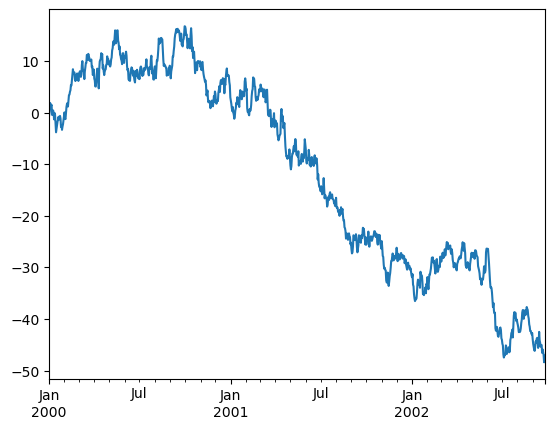

In [138]:
ts.plot()

In [139]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [140]:
df = df.cumsum()


In [141]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

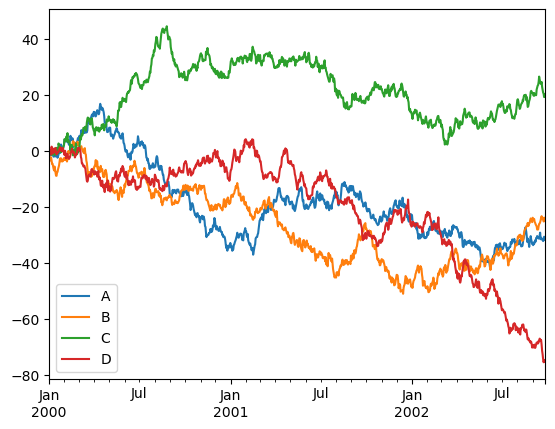

In [142]:
df.plot()
plt.legend(loc='best')